In [9]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.const import *
from LRGSG_package.config.plotlib import inset_axes, restr_twilight
from LRGSG_package.config.utils import read_files_to_2d_array
from LRGSG_package.LRGSG import move_to_rootf, Lattice2D
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
figpath = "data/plot/paper/suppinf/"
figsubpathstr = ['phtra']
paths = {str: f"{figpath}{str}/" for str in figsubpathstr}
for path in paths.values(): os.makedirs(path, exist_ok=True)
#
axvline_kwarg = dict(ls=':', color='k')
xlabelinset_kwargs = dict(labelpad=0, fontsize=18)
ylabelinset_kwargs = dict(rotation=90, labelpad=10, va="center",fontsize=18)
axins_tickparams_kwargs = dict(axis='both', which='major', size=7, width=1.25, labelsize=16)
axlegend_kwargs = dict(ncol=1, loc='lower left', fontsize=18)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [47]:
sides = [8, 16, 32, 48, 64, 96, 128]
datpath = "phase_transition_l2d/"
geometry_cell_dict = {'squared': L2D_RAND_CELL_LIST,
                    'triangular': L2D_RAND_CELL_LIST,
                    'hexagonal': L2D_RAND_CELL_LIST}

In [48]:
pc = {}
for geo,cells in geometry_cell_dict.items():
    pc[geo] = {}
    for cell in cells:
        pc[geo][cell] = []
        fig, ax = plt.subplots(figsize=(6, 6))
        axins = inset_axes(ax, width=2, height=2)
        axins.axvline(x=L2D_P_C_DICT[geo], **axvline_kwarg)
        for i, L in enumerate(sides):
            col = restr_twilight(i/len(sides))
            l = Lattice2D(L, geo=geo, 
                          initNwDict=True, 
                          with_positions=False,
                          sgpath=datpath)
            data = read_files_to_2d_array(l.phtrapath, cell)
            data = data[np.argsort(data[:, 0])]
            #
            pinf = gaussian_filter(data[:, 5], sigma=2)
            #
            chi = gaussian_filter(data[:, 7]*l.N, sigma=1)
            #
            x_scaled = data[:, 0]
            #
            pinfplot, = ax.plot(x_scaled, pinf, 
                    c=col, marker='', lw=2,
                    label=f"${l.N}$")
            chiplot, = axins.plot(x_scaled, chi,
                          lw=2,zorder=-i,c=col, marker='')
        ax.legend(title=f"{geo[:3]} - {cell[-4:]}", title_fontsize = 13, **axlegend_kwargs)
        ax.set_xlabel(r'$p$')
        ax.set_ylabel(r'$P_\infty$')
        axins.yaxis.set_major_locator(plt.MaxNLocator(3))
        axins.tick_params(**axins_tickparams_kwargs)
        axins.set_xlabel(r'$p$', **xlabelinset_kwargs)
        axins.set_ylabel(r'$\chi$', **ylabelinset_kwargs)
        fname = f"phtra_{geo}_{cell}"
        fig.savefig(f"phtra/{fname}.pdf", 
                    bbox_inches='tight', transparent=True)
        plt.close('all')

In [49]:
pc = {}
for geo,cells in geometry_cell_dict.items():
    pc[geo] = {}
    for cell in cells:
        pc[geo][cell] = []
        fig, ax = plt.subplots(figsize=(6, 6))
        axins = inset_axes(ax, width=2, height=2)
        for i, L in enumerate(sides):
            col = restr_twilight(i/len(sides))
            l = Lattice2D(L, geo=geo, 
                          initNwDict=True, 
                          with_positions=False,
                          sgpath=datpath)
            data = read_files_to_2d_array(l.phtrapath, cell)
            data = data[np.argsort(data[:, 0])]
            #
            pinf = gaussian_filter(data[:, 5], sigma=3)
            pinf_scaled = (L**(15/144))*pinf
            #
            chi = gaussian_filter(data[:, 7]*l.N, sigma=1)
            chi_scaled = (L**(-129/72))*chi
            #
            pc_val = data[np.argmax(chi), 0]
            x_scaled = L**(3/4)*(data[:, 0] - pc_val)
            #
            pinfplot, = ax.plot(x_scaled, pinf_scaled, 
                    c=col, marker='',zorder=-i,lw=2,
                    label=f"${l.N}$")
            chiplot, = axins.plot(x_scaled, chi_scaled,
                          lw=2,zorder=-i,c=col, marker='')
            pc[geo][cell].append(pc_val)
        ax.legend(title=f"{cell}", title_fontsize = 13, **axlegend_kwargs)
        ax.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$')
        ax.set_ylabel(r'$L^{\beta/\nu}P_\infty$')
        axins.yaxis.set_major_locator(plt.MaxNLocator(3))
        axins.tick_params(**axins_tickparams_kwargs)
        axins.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$', **xlabelinset_kwargs)
        axins.set_ylabel(r'$L^{-\gamma/\nu}\chi$', **ylabelinset_kwargs)
        axins.set_xbound([-2.25, 2.25])
        fname = f"collapse_{geo}_{cell}"
        fig.savefig(f"data/plot/paper/suppinf/phtra/{fname}.pdf", 
                    bbox_inches='tight', transparent=True)
        plt.close('all')


In [6]:
sides

[8, 16, 32, 48, 64, 96, 128]

In [11]:
pc

{'squared': {'rand': [0.179, 0.145, 0.118, 0.106, 0.1, 0.0939],
  'randXERR': [0.929, 0.96, 0.96, 0.96, 0.96, 0.96],
  'randZERR': [0.215, 0.164, 0.118, 0.106, 0.097, 0.0879]},
 'triangular': {'rand': [0.23, 0.194, 0.164, 0.152, 0.142, 0.133],
  'randXERR': [0.949, 0.96, 0.96, 0.99, 0.96, 0.99],
  'randZERR': [0.291, 0.206, 0.164, 0.142, 0.133, 0.121]},
 'hexagonal': {'rand': [0.17, 0.117, 0.0919, 0.0778, 0.0742, 0.0672],
  'randXERR': [0.899, 0.949, 0.96, 0.96, 0.96, 0.96],
  'randZERR': [0.11, 0.0919, 0.0813, 0.0707, 0.0672, 0.0566]}}

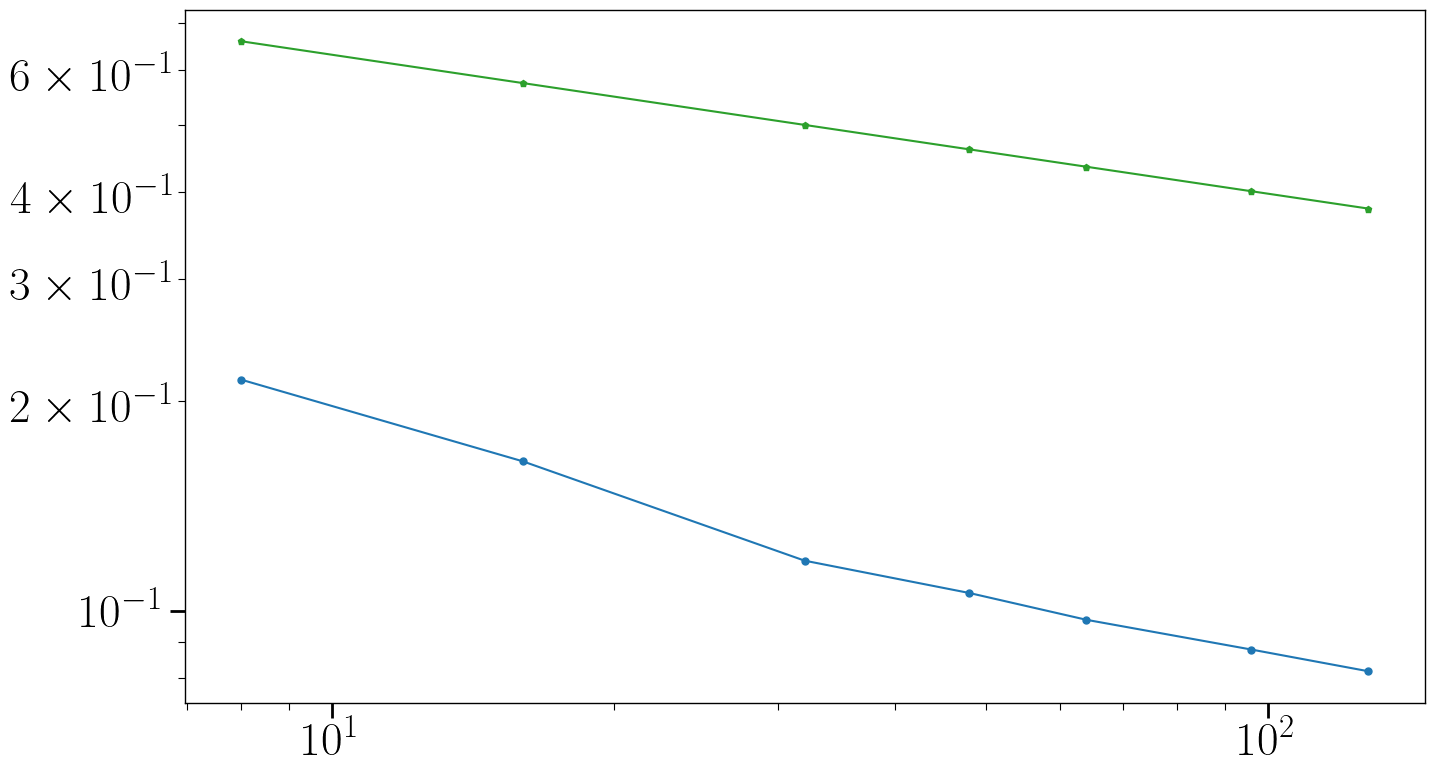

In [18]:
plt.plot(sides, [0.215, 0.164, 0.118, 0.106, 0.097, 0.0879, 0.0818])
plt.plot(sides, np.array(sides).astype(float)**(-1/5))
plt.xscale('log')
plt.yscale('log')